In [1]:
%load_ext autoreload

%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import metrics

# from mlxtend.plotting import plot_decision_regions
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from ast import literal_eval

import warnings
import numpy as np
from collections import OrderedDict

from lob_data_utils import lob, db_result, model, roc_results
from lob_data_utils.svm_calculation import lob_svm
import os


sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

/home/vevurka/.conda/envs/python36/lib/python3.6/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
data_length = 10000
rs_params = [(0.1, 1.0), (1.0, 0.1), (1.0, 1.0), (0.1, 0.1)]
stocks = list(roc_results.result_cv_10000.keys())
data_dir = 'res_pca_gdf_que3'

In [3]:
def get_mean_scores(scores: dict) -> dict:
    mean_scores = {}
    for k, v in scores.items():
        mean_scores[k] = np.mean(v)
    return mean_scores

def get_score_for_clf(clf, df_test):
    x_test = df_test[['queue_imbalance']]
    y_test = df_test['mid_price_indicator'].values
    return model.test_model(clf, x_test, y_test)

def get_logistic_regression(stock, data_length):
    df, df_test = lob.load_prepared_data(
        stock, data_dir='../gaussian_filter/data', cv=False, length=data_length)
    clf = LogisticRegression()
    train_x = df[['queue_imbalance']]

    scores = model.validate_model(clf, train_x, df['mid_price_indicator'], folds=2)
    res = {
        **get_mean_scores(scores),
        'stock': stock,
        'kernel': 'logistic',
    }
    test_scores = get_score_for_clf(clf, df_test)
    return {**res, **test_scores}

In [4]:
df_res = pd.DataFrame()
for stock in stocks:
    for r, s in rs_params:
    #pd.read_csv('svm_features_{}_len{}_r{}_s{}.csv'.format(stock, data_length, r, s))
        filename = data_dir + '/svm_pca_gdf_{}_len{}_r{}_s{}.csv'.format(stock, data_length, r, s)
        if os.path.exists(filename):
            df_temp = pd.read_csv(filename)
            df_temp['r'] = [r] * len(df_temp)
            df_temp['s'] = [s] * len(df_temp)
            df_res = df_res.append(df_temp)
#df_res.drop(columns=['Unnamed: 0'], inplace=True)
columns = ['C', 'f1', 'features', 'gamma', 'kappa',
           'matthews', 'roc_auc', 'stock',
       'test_f1', 'test_kappa', 'test_matthews', 'test_roc_auc', 'r', 's']
df_res[columns].sort_values(by='matthews', ascending=False).groupby('stock').head(1)

,C,f1,features,gamma,kappa,matthews,roc_auc,stock,test_f1,test_kappa,test_matthews,test_roc_auc,r,s
42,1000.0,0.604100,pca_gdf_que3,0.001,0.187905,0.191102,0.593711,11946,0.632794,0.200535,0.201271,0.599921,0.1,1.0
16,0.1,0.594523,pca_gdf_que3,0.100,0.182453,0.183835,0.591498,3879,0.575435,0.122216,0.122692,0.561159,0.1,1.0
38,100.0,0.596202,pca_gdf_que3,1.000,0.168391,0.169863,0.584201,3035,0.575095,0.103686,0.103828,0.551772,0.1,1.0
35,100.0,0.570434,pca_gdf_que3,0.001,0.162383,0.163781,0.581383,7858,0.530425,0.173911,0.176532,0.586311,0.1,1.0
36,100.0,0.628649,pca_gdf_que3,0.010,0.152635,0.161718,0.576450,13061,0.642105,0.094994,0.102277,0.546556,0.1,1.0
17,0.1,0.598280,pca_gdf_que3,1.000,0.151906,0.159219,0.576036,1956,0.611311,0.134272,0.138172,0.567191,0.1,1.0
16,0.1,0.580595,pca_gdf_que3,0.100,0.149325,0.159088,0.574649,4320,0.638015,0.173926,0.176160,0.586271,0.1,1.0
30,10.0,0.563001,pca_gdf_que3,0.100,0.151053,0.158577,0.575905,12417,0.588121,0.154291,0.154787,0.577223,0.1,1.0
38,100.0,0.584928,pca_gdf_que3,1.000,0.154812,0.157235,0.577658,9761,0.603670,0.133741,0.135408,0.566740,0.1,1.0
35,100.0,0.611943,pca_gdf_que3,0.001,0.155394,0.156893,0.577441,10484,0.567673,0.113104,0.113672,0.556679,0.1,1.0


In [5]:
log_res = []
for stock in stocks:
    log_res.append(get_logistic_regression(stock, data_length))
df_log_res = pd.DataFrame(log_res)
df_log_res['stock'] = df_log_res['stock'].values.astype(np.int)
df_log_res.index = df_log_res['stock'].values.astype(np.int)

Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0
Training fold  0


In [6]:
df_gdf_best = df_res[columns].sort_values(by='matthews', ascending=False).groupby('stock').head(1)
df_gdf_best['stock'] = df_gdf_best['stock'].values.astype(np.int)
df_gdf_best.index = df_gdf_best['stock'].values.astype(np.int)

In [7]:
df_all = pd.merge(df_gdf_best, df_log_res, on='stock', suffixes=['_svm', '_log'])

In [8]:
df_all.columns

Index(['C', 'f1_svm', 'features', 'gamma', 'kappa_svm', 'matthews_svm',
       'roc_auc_svm', 'stock', 'test_f1_svm', 'test_kappa_svm',
       'test_matthews_svm', 'test_roc_auc_svm', 'r', 's', 'f1_log',
       'kappa_log', 'kernel', 'matthews_log', 'precision', 'recall',
       'roc_auc_log', 'test_f1_log', 'test_kappa_log', 'test_matthews_log',
       'test_precision', 'test_recall', 'test_roc_auc_log', 'train_f1',
       'train_kappa', 'train_matthews', 'train_precision', 'train_recall',
       'train_roc_auc'],
      dtype='object')

In [9]:
all_columns = ['matthews_svm', 'matthews_log',  'test_matthews_svm','test_matthews_log', 
       'roc_auc_svm', 'roc_auc_log', 'test_roc_auc_svm',  'test_roc_auc_log', 'stock' ]
df_all[all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.191102,0.195228,0.201271,0.207584,0.593711,0.597678,0.599921,0.603555,11946
1,0.183835,0.156645,0.122692,0.109705,0.591498,0.577662,0.561159,0.554478,3879
2,0.169863,0.180586,0.103828,0.097073,0.584201,0.590223,0.551772,0.548374,3035
3,0.163781,0.153560,0.176532,0.171398,0.581383,0.576792,0.586311,0.584732,7858
4,0.161718,0.133289,0.102277,0.117822,0.576450,0.566207,0.546556,0.558221,13061
5,0.159219,0.139191,0.138172,0.132541,0.576036,0.569601,0.567191,0.565751,1956
6,0.159088,0.186482,0.176160,0.154918,0.574649,0.592922,0.586271,0.577343,4320
7,0.158577,0.140348,0.154787,0.149033,0.575905,0.569520,0.577223,0.573501,12417
8,0.157235,0.179309,0.135408,0.134666,0.577658,0.589699,0.566740,0.566471,9761
9,0.156893,0.176488,0.113672,0.110441,0.577441,0.588278,0.556679,0.555225,10484


In [10]:
df_all['matthews_diff'] = df_all['matthews_svm'] -  df_all['matthews_log']
df_all['matthews_test_diff'] = df_all['test_matthews_svm'] - df_all['test_matthews_log']

In [11]:
result_cv_15000 = {'9069': 0.56266492905467125, '9063': 0.55890612062034239,
                   '9094': 0.56271758343003708,
                   '10166': 0.54209270809674659, '9061': 0.53172059475198441,
                   '9064': 0.5445462725690029,
                   '11244': 0.53511679644048948, '9062': 0.54049738307164052,
                   '9067': 0.54498044328552808,
                   '9265': 0.55580632143346032, '9058': 0.53573417928037304,
                   '9269': 0.54865753911806547,
                   '12059': 0.55367480325463525}
stocks15000 = np.array(list(result_cv_15000.keys())).astype(np.int)

In [12]:
df_all.loc[df_all[df_all['stock'].isin(stocks15000)]['matthews_diff'].nlargest(n=2).index]

,C,f1_svm,features,gamma,kappa_svm,matthews_svm,roc_auc_svm,stock,test_f1_svm,test_kappa_svm,...,test_recall,test_roc_auc_log,train_f1,train_kappa,train_matthews,train_precision,train_recall,train_roc_auc,matthews_diff,matthews_test_diff
45,10.0,0.563155,pca_gdf_que3,0.01,0.113733,0.114434,0.557050,12059,0.556496,0.108907,...,0.594512,0.552177,0.549254,0.093757,0.093758,0.547619,0.550898,0.546878,0.035850,0.004296
38,100.0,0.545462,pca_gdf_que3,0.10,0.121470,0.123323,0.560748,9265,0.510638,0.104381,...,0.483202,0.547775,0.543279,0.139113,0.139484,0.565145,0.523041,0.569439,0.029839,0.009956


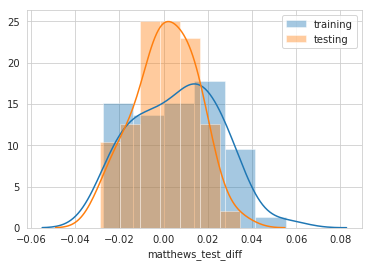

In [13]:
sns.distplot(df_all['matthews_diff'], label='training')
sns.distplot(df_all['matthews_test_diff'], label='testing')
plt.legend()

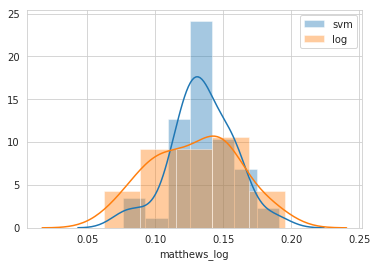

In [14]:
sns.distplot(df_all['matthews_svm'], label='svm')
sns.distplot(df_all['matthews_log'], label='log')
plt.legend()

In [15]:
df_all['matthews_diff'].median(), df_all['matthews_test_diff'].median()

(0.007832439763149512, 0.000763625908023341)

In [16]:
len(df_all[df_all['matthews_svm'] > df_all['matthews_log']][all_columns]), len(df_all[df_all['test_matthews_svm'] > df_all['test_matthews_log']]), len(df_all)

(32, 30, 53)

In [17]:
df_all[df_all['test_matthews_svm'] < df_all['test_matthews_log']][all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.191102,0.195228,0.201271,0.207584,0.593711,0.597678,0.599921,0.603555,11946
4,0.161718,0.133289,0.102277,0.117822,0.576450,0.566207,0.546556,0.558221,13061
10,0.154583,0.148425,0.113372,0.131784,0.574610,0.573182,0.548113,0.565375,12255
11,0.153835,0.144501,0.114780,0.123164,0.575346,0.570231,0.554607,0.557401,1472
13,0.153260,0.158099,0.126408,0.139722,0.574260,0.578773,0.563027,0.567181,4799
14,0.150381,0.155253,0.138334,0.142525,0.574628,0.577556,0.569059,0.571199,5836
15,0.148576,0.156086,0.130367,0.143297,0.573383,0.577835,0.565153,0.571621,11869
20,0.139079,0.131247,0.085776,0.106819,0.567759,0.563792,0.542710,0.553070,9270
24,0.135072,0.123391,0.132628,0.151493,0.563604,0.561538,0.556675,0.574510,2602
27,0.132814,0.155153,0.117727,0.146313,0.563687,0.577888,0.555870,0.572998,1907


In [18]:
len(df_all[df_all['roc_auc_svm'] > df_all['roc_auc_log']][all_columns]), len(df_all[df_all['test_roc_auc_svm'] > df_all['test_roc_auc_log']][all_columns]), len(df_all)

(32, 29, 53)

In [19]:
df_all[df_all['test_matthews_svm'] < df_all['test_matthews_log']][all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.191102,0.195228,0.201271,0.207584,0.593711,0.597678,0.599921,0.603555,11946
4,0.161718,0.133289,0.102277,0.117822,0.576450,0.566207,0.546556,0.558221,13061
10,0.154583,0.148425,0.113372,0.131784,0.574610,0.573182,0.548113,0.565375,12255
11,0.153835,0.144501,0.114780,0.123164,0.575346,0.570231,0.554607,0.557401,1472
13,0.153260,0.158099,0.126408,0.139722,0.574260,0.578773,0.563027,0.567181,4799
14,0.150381,0.155253,0.138334,0.142525,0.574628,0.577556,0.569059,0.571199,5836
15,0.148576,0.156086,0.130367,0.143297,0.573383,0.577835,0.565153,0.571621,11869
20,0.139079,0.131247,0.085776,0.106819,0.567759,0.563792,0.542710,0.553070,9270
24,0.135072,0.123391,0.132628,0.151493,0.563604,0.561538,0.556675,0.574510,2602
27,0.132814,0.155153,0.117727,0.146313,0.563687,0.577888,0.555870,0.572998,1907


In [20]:
df_all[df_all['test_roc_auc_svm'] < df_all['test_roc_auc_log']][all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.191102,0.195228,0.201271,0.207584,0.593711,0.597678,0.599921,0.603555,11946
4,0.161718,0.133289,0.102277,0.117822,0.576450,0.566207,0.546556,0.558221,13061
10,0.154583,0.148425,0.113372,0.131784,0.574610,0.573182,0.548113,0.565375,12255
11,0.153835,0.144501,0.114780,0.123164,0.575346,0.570231,0.554607,0.557401,1472
12,0.153509,0.170277,0.157434,0.156886,0.574456,0.585104,0.578408,0.578421,10508
13,0.153260,0.158099,0.126408,0.139722,0.574260,0.578773,0.563027,0.567181,4799
14,0.150381,0.155253,0.138334,0.142525,0.574628,0.577556,0.569059,0.571199,5836
15,0.148576,0.156086,0.130367,0.143297,0.573383,0.577835,0.565153,0.571621,11869
20,0.139079,0.131247,0.085776,0.106819,0.567759,0.563792,0.542710,0.553070,9270
24,0.135072,0.123391,0.132628,0.151493,0.563604,0.561538,0.556675,0.574510,2602
